![alt text](https://www.mbari.org/wp-content/uploads/2014/11/logo-mbari-3b.png "MBARI")
<div align="center">Copyright (c) 2020, MBARI</div>

* Distributed under the terms of the GPL License
* Author: dcline@mbari.org

# Uniform colormapping 

A spectrogram is generally represented as a heat map which requires a colormap to visualize.  A color map is simply a lookup table from a data value, in this case the magnitude of the FFT, to a color.   

A good color map will aid in visual perception when refining your training examples.

Deep CNNs also have different classification performance on color versus grayscale images, so we don't want to exclude color in our image representation to the classifier.


## References
https://arxiv.org/pdf/1712.01662.pdf "Optimizing colormaps with consideration for color vision deficiency to enable accurate interpretation of scientific data"

Deep CNNs (such as VGG1 and Alexnet2) exhibit different performance on classification, depending on whether they are presented with color or grayscale images.
https://ivrl.epfl.ch/research-2/research-current/research-color/page-149011-en-html/

## Setup

In [11]:
%%capture
!pip install holoviews colorcet matplotlib==2.2.2 librosa
from math import ceil
from holoviews.plotting.util import process_cmap
import holoviews as hv
import numpy as np
import matplotlib
import librosa
import colorcet
import soundfile as sf
# need to explicity enable matplotlib as hv back-end
hv.extension('matplotlib')

## There are many colormaps! Many of them have a nonuniform color.

<img src="./colormaps.png">
reference: https://user-images.githubusercontent.com/1550771/37967483-6c15a388-31c3-11e8-85b8-17926b70e63b.png

### Utility functions for plotting color maps

In [2]:
colormaps = hv.plotting.list_cmaps()
spacing = np.linspace(0, 1, 64)[np.newaxis]
opt_kwargs = dict(aspect=6, xaxis=None, yaxis=None, sublabel_format='')

def filter_cmaps(category):
    return hv.plotting.util.list_cmaps(records=True,category=category,reverse=False)

def cmap_examples(category,cols=4):
    cms = filter_cmaps(category)
    n = len(cms)*1.0
    c=ceil(n/cols) if n>cols else cols
    bars = [hv.Image(spacing, ydensity=1, label="{0} ({1})".format(r.name,r.provider))\
            .opts(cmap=process_cmap(r.name,provider=r.provider), **opt_kwargs)
           for r in cms]
    return hv.Layout(bars).opts(vspace=0.1, hspace=0.1, transpose=(n>cols)).cols(c)

## Some example uniform maps

:Layout
   .Image.Blues_left_parenthesis_colorcet_right_parenthesis     :Image   [x,y]   (z)
   .Image.Kb_left_parenthesis_colorcet_right_parenthesis        :Image   [x,y]   (z)
   .Image.Kg_left_parenthesis_colorcet_right_parenthesis        :Image   [x,y]   (z)
   .Image.Kr_left_parenthesis_colorcet_right_parenthesis        :Image   [x,y]   (z)
   .Image.Bgy_left_parenthesis_colorcet_right_parenthesis       :Image   [x,y]   (z)
   .Image.Bgyw_left_parenthesis_colorcet_right_parenthesis      :Image   [x,y]   (z)
   .Image.Bmw_left_parenthesis_colorcet_right_parenthesis       :Image   [x,y]   (z)
   .Image.Bmy_left_parenthesis_colorcet_right_parenthesis       :Image   [x,y]   (z)
   .Image.Cividis_left_parenthesis_matplotlib_right_parenthesis :Image   [x,y]   (z)
   .Image.Dimgray_left_parenthesis_colorcet_right_parenthesis   :Image   [x,y]   (z)
   .Image.Fire_left_parenthesis_colorcet_right_parenthesis      :Image   [x,y]   (z)
   .Image.Gray_left_parenthesis_colorcet_right_parenthesis      :Image   [x,y]   (z)
   .Image.Inferno_left_parenthesis_bokeh_right_parenthesis      :Image   [x,y]   (z)
   .Image.Inferno_left_parenthesis_matplotlib_right_parenthesis :Image   [x,y]   (z)
   .Image.Kbc_left_parenthesis_colorcet_right_parenthesis       :Image   [x,y]   (z)
   .Image.Kgy_left_parenthesis_colorcet_right_parenthesis       :Image   [x,y]   (z)
   .Image.Magma_left_parenthesis_bokeh_right_parenthesis        :Image   [x,y]   (z)
   .Image.Magma_left_parenthesis_matplotlib_right_parenthesis   :Image   [x,y]   (z)
   .Image.Plasma_left_parenthesis_bokeh_right_parenthesis       :Image   [x,y]   (z)
   .Image.Plasma_left_parenthesis_matplotlib_right_parenthesis  :Image   [x,y]   (z)
   .Image.Viridis_left_parenthesis_bokeh_right_parenthesis      :Image   [x,y]   (z)
   .Image.Viridis_left_parenthesis_matplotlib_right_parenthesis :Image   [x,y]   (z)
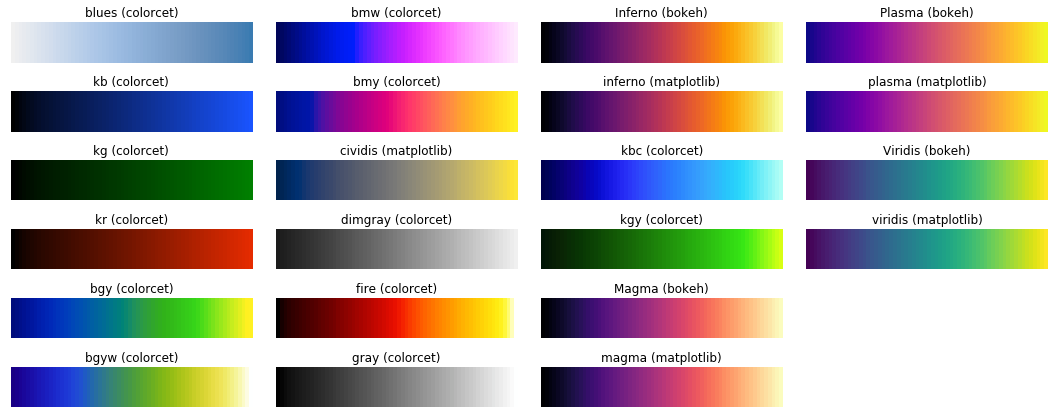

In [3]:
cmap_examples('Uniform Sequential')

## You can also create custom uniform maps. Here, the popular *parula* colormap in Matlab is reproduced

In [4]:
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905],
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143],
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952,
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286],
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238,
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571],
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571,
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429],
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667,
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286],
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571,
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429],
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524,
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048,
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667],
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381,
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381],
 [0.0589714286, 0.6837571429, 0.7253857143],
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429],
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429,
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048],
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619,
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667],
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524,
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905],
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476,
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143],
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333],
 [0.7184095238, 0.7411333333, 0.3904761905],
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667,
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762],
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217],
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857,
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619],
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857,
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381],
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857],
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309],
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333,
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333],
 [0.9763, 0.9831, 0.0538]]
from matplotlib.colors import LinearSegmentedColormap
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

## Let's visually compare different color maps using a Blue whale D call

In [5]:
def heatmap(samples,offset=0.0,label=None):
    """
    Compresses samples into a visible range between 0 and 1.0.
    samples = fft output
    """ 
    w,h         = samples.shape
    span        = samples.max()-samples.min()
    compressed  = np.where(samples!=0,offset+(1.0-offset)*samples/span,0)
    args        = dict(label=label) if label else {}
    return hv.Image(compressed,bounds=(0,0,w,h),**args)

:Layout
   .Image.Blues     :Image   [x,y]   (z)
   .Image.Viridis   :Image   [x,y]   (z)
   .Image.Parulamap :Image   [x,y]   (z)
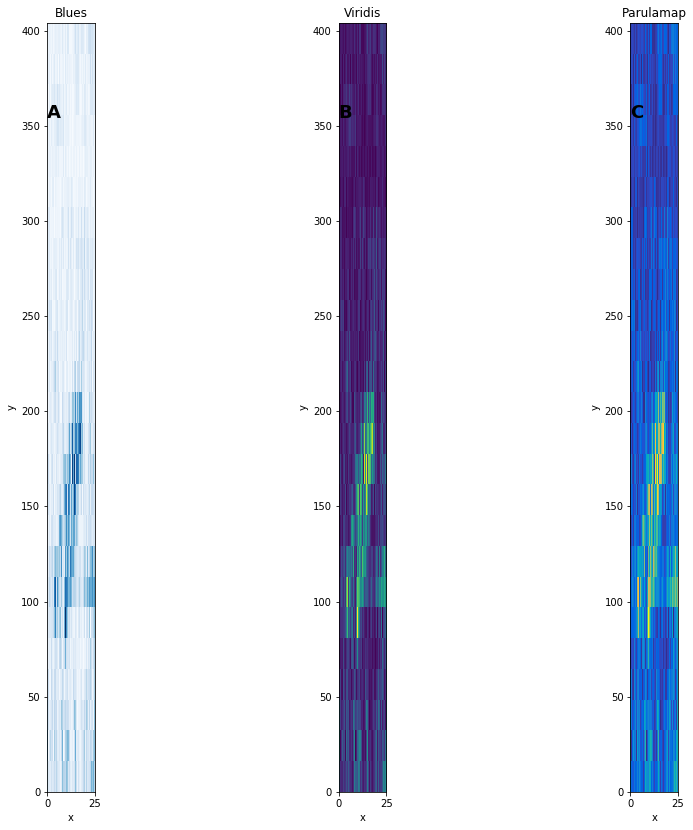

In [12]:
num_fft = 512
overlap = 0.95
info = sf.info('../data/blue_D_1.wav')
f = sf.SoundFile('../data/blue_D_1.wav') 
samples = f.read(info.frames)
D = np.abs(librosa.stft(y=samples, n_fft=num_fft, window='hann', hop_length=int(num_fft*(1-overlap))))
low_freq = 20; high_freq = 120 
freq_bin = float(D.shape[0]) / float(info.samplerate / 2)
minM = -1 * (D.shape[0] - int(low_freq * freq_bin))
maxM = -1 * (D.shape[0] - int(high_freq * freq_bin))
img_hot = heatmap(np.flip(D[minM:maxM]), label="Blues").opts(cmap="Blues")
img_viridis = heatmap(np.flip(D[minM:maxM]), label="Viridis").opts(cmap="Viridis")
img_parulamap = heatmap(np.flip(D[minM:maxM]), label="Parulamap").opts(cmap=parula_map)
img_hot + img_viridis + img_parulamap